# CS585 Problem Set 4 (Total points: 35 + 5 bonus)

Assignment adapted from Svetlana Lazebnik

### Instructions

1.  Assignment is due at **5 PM on Tuesday Mar 29 2022**.

2.  Submission instructions:

    1.  A single `.pdf` report that contains your work for Q1, Q2, Q3, and
        Q4. For Q1 you can either type out your responses in LaTeX, or
        any other word processing software.  You can also hand write them on a
        tablet, or scan in hand-written answers. If you hand-write, please make
        sure they are neat and legible. If you are scanning, make sure that the
        scans are legible. Lastly, convert your work into a `PDF`. 

        For Q2, Q3, and Q4 your response should be electronic (no handwritten
        responses allowed). You should respond to the questions Q2, Q3, and Q4
        individually and include images as necessary. Your response to all 
        questions in the PDF report should be self-contained. It should include
        all the output you want us to look at. You will not receive credit for 
        any results you have obtained, but failed to include directly in the PDF
        report file. 

        PDF file should be submitted to
        [Gradescope](https://www.gradescope.com) under `PS4`. Please tag the reponses in your PDF with the Gradescope
        questions outline  as described in
        [Submitting an Assignment](https://youtu.be/u-pK4GzpId0). 

    2.  You also need to submit code for Q2, Q3, and Q4 in the form of a single
        `.zip` file that includes all your code, all in the same
        directory. You can submit Python code in
        `.ipynb` format. Code should also be submitted to
        [Gradescope](https://www.gradescope.com) under `PS4-Code`. 
        *Not submitting your code will lead to a loss of
        100% of the points on Q2, Q3, and Q4.*

    3.  We reserve the right to take off points for not following
        submission instructions. In particular, please tag the reponses
        in your PDF with the Gradescope questions outline as described
        in [Submitting an Assignment](https://youtu.be/u-pK4GzpId0). 



### Problems

1. **Optical Flow [10 pts, 3 parts]**

  1. **[2 pts]** Describe a scenario where the object is not moving but the optical flow field is not zero.

  2. **[3 pts]** The Constant Brightness Assumption (CBA) is used in the Lucas and Kanade Algorithm. Describe how the algorithm handles the fact that the assumption might be violated.

  5. **[5 pts]** Why does the first order talor series provide a reasonable approximation for estimating optical flow?

### Answer ###

A. When the object is not moving, but the lighting changes, the optical flow field would not be zero

B. Asumming we have some changes in lighting, if we have high enough frame rate, the changes would be small and our algorithm would still work. However, if CBA does not hold, we can do feature matching, like SIFT, or tracking features, do exhaustive neighborhood search with normalized correlation. 

C. If we make assumption that changes in our motion are small, our derivatives are going to be small, and the higher order would not create much change, negligible difference. This is why we would only consider first order expansion of Taylor series. 

2. **Camera Calibration [10 pts]**. For the pair of images in the folder `calibraion`, calculate the camera projection matrices by using 2D matches in both views and 3D point
coordinates in `lab_3d.txt`. Once you have computed your projection matrices,
you can evaluate them using the provided evaluation function
(evaluate_points). The function outputs the projected 2-D points and
residual error. Report the estimated 3 × 4 camera projection matrices (for
each image), and residual error.
<b>Hint:</b> The residual error should be < 20 and the squared distance of the
projected 2D points from actual 2D points should be < 4.



In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def evaluate_points(M, points_2d, points_3d):
    """
    Visualize the actual 2D points and the projected 2D points calculated from
    the projection matrix
    You do not need to modify anything in this function, although you can if you
    want to
    :param M: projection matrix 3 x 4
    :param points_2d: 2D points N x 2
    :param points_3d: 3D points N x 3
    :return:
    """
    N = len(points_3d)
    points_3d = np.hstack((points_3d, np.ones((N, 1))))
    points_3d_proj = np.dot(M, points_3d.T).T
    u = points_3d_proj[:, 0] / points_3d_proj[:, 2]
    v = points_3d_proj[:, 1] / points_3d_proj[:, 2]
    residual = np.sum(np.hypot(u-points_2d[:, 0], v-points_2d[:, 1]))
    points_3d_proj = np.hstack((u[:, np.newaxis], v[:, np.newaxis]))
    return points_3d_proj, residual

# Write your code here for camera calibration
def camera_calibration(pts_2d, pts_3d):
    """
    write your code to compute camera matrix
    """
    # <YOUR CODE>
    matches = np.hstack([pts_3d, pts_2d])
    return compute_homography(matches)

def compute_homography(matches):
    x_3d = [] #3d image coords
    x_2d = [] #2d image coords
    zero = np.zeros((4,))
    for i in range(matches.shape[0]):
        x_3d.append(np.hstack([matches[i,0], matches[i,1], matches[i,2], 1])) #convert (x,y,z) into [x,y,z,1] for transformation
        x_2d.append(np.hstack([matches[i,3], matches[i,4], 1]))
    x_3d = np.array(x_3d) #convert to numpy
    x_2d = np.array(x_2d)
    homography = [] #creating the homography matrix
    for i in range(matches.shape[0]):
        homography.append(np.array(np.hstack([zero.T, x_3d[i], -x_2d[i][1]*(x_3d[i])])))
        homography.append(np.array(np.hstack([x_3d[i], zero.T, -x_2d[i][0]*(x_3d[i])])))
    homography = np.array(homography) 
    u,s,v = np.linalg.svd(np.array(homography)) #extracting the solution for least square homogenous AX = 0
    M = np.reshape(v[-1,:],(3,4))
    M = M/M[2,2] #normalizing
    return M

# Load 3D points, and their corresponding locations in 
# the two images.
pts_3d = np.loadtxt('calibration/lab_3d.txt')
matches = np.loadtxt('calibration/lab_matches.txt')

# print lab camera projection matrices:
lab1_proj = camera_calibration(matches[:, :2], pts_3d)
lab2_proj = camera_calibration(matches[:, 2:], pts_3d)
print('lab 1 camera projection')
print(lab1_proj)

print('')
print('lab 2 camera projection')
print(lab2_proj)

# evaluate the residuals for both estimated cameras
_, lab1_res = evaluate_points(lab1_proj, matches[:, :2], pts_3d)
print('residuals between the observed 2D points and the projected 3D points:')
print('residual in lab1:', lab1_res)
_, lab2_res = evaluate_points(lab2_proj, matches[:, 2:], pts_3d)
print('residual in lab2:', lab2_res)

lab 1 camera projection
[[-4.53187041e+03 -2.13760331e+02  6.55731767e+02  1.43125880e+06]
 [-4.48880176e+02 -9.31617589e+02  4.05512340e+03  2.98472081e+05]
 [-2.45529488e+00 -4.01727797e+00  1.00000000e+00  1.94283277e+03]]

lab 2 camera projection
[[-3.64428424e+03  2.11186971e+03  6.97164388e+02  4.34640616e+05]
 [-8.13701852e+02 -5.38648853e+02  3.82454420e+03  2.95748507e+05]
 [-4.00069963e+00 -1.95030316e+00  1.00000000e+00  1.78129302e+03]]
residuals between the observed 2D points and the projected 3D points:
residual in lab1: 13.54583289475388
residual in lab2: 15.544953451662474


3. **Camera Centers [5 pts].** Calculate the camera centers using the
estimated or provided projection matrices. Report the 3D
locations of both cameras in your report. <b>Hint:</b> Recall that the
camera center is given by the null space of the camera matrix.



In [2]:
import scipy.linalg
# Write your code here for computing camera centers
def calc_camera_center(proj):
    """
    write your code to get camera center in the world 
    from the projection matrix
    """
    # <YOUR CODE>
    return scipy.linalg.null_space(proj)
  
    

# <YOUR CODE> compute the camera centers using 
# the projection matrices
lab1_c = calc_camera_center(lab1_proj)
lab2_c = calc_camera_center(lab2_proj)
print('lab1 camera center', lab1_c)
print('lab2 camera center', lab2_c)
lab1_c = lab1_c.T/lab1_c[3]
lab2_c = lab2_c.T/lab2_c[3]

lab1 camera center [[0.7072697 ]
 [0.70349616]
 [0.06969489]
 [0.0023126 ]]
lab2 camera center [[0.70061826]
 [0.71005902]
 [0.07031994]
 [0.00231151]]


4. **Triangulation [10 pts].** Use linear least squares to triangulate the
3D position of each matching pair of 2D points using the two camera
projection matrices. As a sanity check, your triangulated 3D points for the
lab pair should match very closely the originally provided 3D points in
`lab_3d.txt`. Display the two camera centers and
reconstructed points in 3D. Include snapshots of this visualization in your
report. Also report the residuals between the observed 2D points and the
projected 3D points in the two images. Note: You do not
need the camera centers to solve the triangulation problem. They are used
just for the visualization.



Mean 3D reconstuction error for the lab data:  0.00491
2D reprojection error for the lab 1 data:  5.849765817527915
2D reprojection error for the lab 2 data:  6.425985360225127


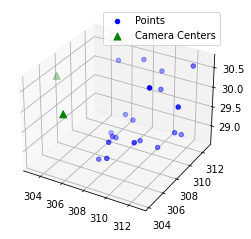

In [3]:
# Write your code here for triangulation
from mpl_toolkits.mplot3d import Axes3D
def triangulation(lab_pt1, lab1_proj, lab_pt2, lab2_proj):
    """
    write your code to triangulate the points in 3D
    """
    # <YOUR CODE>
    X_coords = cross_product_and_SVD(lab_pt1[0], lab1_proj, lab_pt2[0], lab2_proj)
    for i in range(1, lab_pt1.shape[0]):
        X_coords = np.vstack([X_coords,cross_product_and_SVD(lab_pt1[i], lab1_proj, lab_pt2[i], lab2_proj)])
    return X_coords

def cross_product_and_SVD(x1y1, pj1, x2y2, pj2):
    #compute the cross product (x_1 x P_1),(x_2 x P_2)  and concatnate them to solve for X
    cross_product_result = np.vstack([x1y1[1]*pj1[2] - pj1[1],
                        pj1[0] - x1y1[0]*pj1[2],
                        x2y2[1]*pj2[2] - pj2[1],
                        pj2[0] - x2y2[0]*pj2[2]])
    u,s,v = np.linalg.svd(cross_product_result.astype(float)) #extracting the solution for least square homogenous AX = 0
    X = v[-1,:]
    X = X/X[3] #normalizing
    return X[:3]

def evaluate_points_3d(points_3d_lab, points_3d_gt):
    """
    write your code to evaluate the triangulated 3D points
    """
    # <YOUR CODE>
    return np.sum((points_3d_lab - points_3d_gt)**2)

# triangulate the 3D point cloud for the lab data 
matches_lab = np.loadtxt('calibration/lab_matches.txt')
lab_pt1 = matches_lab[:,:2]
lab_pt2 = matches_lab[:,2:]
points_3d_gt = np.loadtxt('calibration/lab_3d.txt')
points_3d_lab = triangulation(lab_pt1, lab1_proj, lab_pt2, lab2_proj)
res_3d_lab = evaluate_points_3d(points_3d_lab, points_3d_gt) 
print('Mean 3D reconstuction error for the lab data: ', round(np.mean(res_3d_lab), 5))
_, res_2d_lab1 = evaluate_points(lab1_proj, lab_pt1, points_3d_lab)
_, res_2d_lab2 = evaluate_points(lab2_proj, lab_pt2, points_3d_lab)
print('2D reprojection error for the lab 1 data: ', np.mean(res_2d_lab1))
print('2D reprojection error for the lab 2 data: ', np.mean(res_2d_lab2))
# visualization of lab point cloud
camera_centers = np.vstack((lab1_c, lab2_c))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points_3d_lab[:, 0], points_3d_lab[:, 1], points_3d_lab[:, 2], c='b', label='Points')
ax.scatter(camera_centers[:, 0], camera_centers[:, 1], camera_centers[:, 2], c='g', s=50, marker='^', label='Camera Centers')
ax.legend(loc='best')

5. **Extra Credits [5 pts].** Use the putative match generation and RANSAC
code from `PS3` to estimate fundamental matrices without
ground-truth matches. For this part, only use the normalized algorithm.
Report the number of inliers and the average residual for the inliers.
Compare the quality of the result with the one you get from ground-truth
matches.



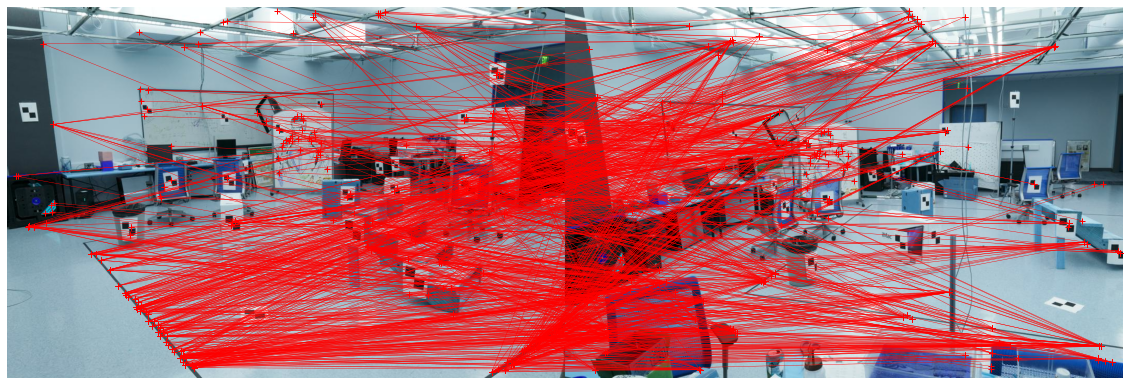

In [407]:
#from PS3
import matplotlib.pyplot as plt
import numpy as np
import cv2, skimage
from scipy.spatial import distance
import scipy
def imread(fname):
    return cv2.imread(fname)
def imread_bw(fname):
    return cv2.cvtColor(imread(fname), cv2.COLOR_BGR2GRAY)
def imshow(img):
    skimage.io.imshow(img)   
def get_sift_data(img):
    sift = cv2.SIFT_create()
    kp, des = sift.detectAndCompute(img, None)
    kp = np.array([k.pt for k in kp])
    return kp, des
def plot_inlier_matches(ax, img1, img2, inliers):
    res = np.hstack([img1, img2])
    ax.set_aspect('equal')
    ax.imshow(res, cmap='gray')   
    ax.plot(inliers[:,2], inliers[:,3], '+r')
    ax.plot(inliers[:,0] + img1.shape[1], inliers[:,1], '+r')
    ax.plot([inliers[:,2], inliers[:,0] + img1.shape[1]],
            [inliers[:,3], inliers[:,1]], 'r', linewidth=0.4)
    ax.axis('off')
def get_best_matches(img1, img2, num_matches):
    kp1, des1 = get_sift_data(img1)
    kp2, des2 = get_sift_data(img2)
    dist = scipy.spatial.distance.cdist(des1, des2, 'sqeuclidean')
    idx = np.argpartition(dist,100, axis = None) #getting the first 100 lowest dist, flatten dist in the process
    kp1_pos = idx[:num_matches]//kp2.shape[0] #retrieving kp1 from the flatten list
    kp2_pos = idx[:num_matches]%kp2.shape[0] #retrieving kp2 from the flatten list
    return np.hstack([kp2[kp2_pos],kp1[kp1_pos]])
img1 = imread('./calibration/lab1.jpg')
img2 = imread('./calibration/lab2.jpg')
data = get_best_matches(img1, img2, 1000)
fig, ax = plt.subplots(figsize=(20,10))
plot_inlier_matches(ax, img1, img2, data)
#fig.savefig('sift_match.pdf', bbox_inches='tight')

In [408]:
def estimate_fundamental_matrix(matches):
    xy_prime = matches[:, :2]
    xy = matches[:, 2:]
    #xy_p_norm, T_prime = normalize(xy_prime)
    #xy_p_norm = xy_p_norm.T[:, :2]
    #xy_norm, T = normalize(xy)
    #xy_norm = xy_norm.T[:, :2]
    #U = construct_U(xy_p_norm, xy_norm)
    U = construct_U(matches[:,:2],matches[:, 2:])
    u,s,v = np.linalg.svd(U)
    F_fullrank = np.reshape(v[-1,:],(3,3))
    u,s,v = np.linalg.svd(F_fullrank)
    s[2] = 0
    #F = T_prime.T@(u@np.diag(s)@v)@T
    F = u@np.diag(s)@v
    return F

def normalize(points):
    center = np.mean(points, axis = 0)
    s = np.sqrt(2/(np.mean(points - center)**2))
    T = np.array([[s,0,0],[0,s,0],[0,0,1]])@np.array([[1,0,-center[0]],[0,1,-center[1]],[0,0,1]])
    homogen = np.hstack([points, np.ones((points.shape[0],1))])
    return T@homogen.T, T

def construct_U(xy_prime, xy):
    x = xy[:,0]
    y = xy[:,1]
    x_p = xy_prime[:,0]
    y_p = xy_prime[:,1]
    U = np.array([x_p*x, x_p*y, x_p, y_p*x, y_p*y, y_p, x, y])
    U = np.hstack([U, np.ones((U.shape[0],1))])
    return U


In [409]:
def ransac(data, max_iters=100, min_inliers=10):
    inlier_threshold = 100 #set threshold low enough so we get accurate transformation, without overfitting
    homo_list = [] #list of homography 
    numinliers = [] #number of inliers for each homography
    inliers_list = [] #list of inliers for each homography
    residual = []
    for i in range(max_iters):
        count=0 #counter to count inliers
        inliers_list_of_this_line = [] #list to store inliers of this transformation
        randomPoint = np.array([0,0,0,0,0,0,0,0])
        for n in range(8):
            randomPoint[n] = np.random.randint(0, data.shape[0]) #randomly select 4 points
        matches = np.vstack([data[randomP] for randomP in randomPoint]) 
        H = estimate_fundamental_matrix(matches) #compute transfrom H matrix on these 4 points
        img1xy = np.vstack([data[:,2], data[:,3], np.ones((data.shape[0],))]) #convert (x,y) to [x,y,1] for transformation
        img2xy = np.vstack([data[:,0], data[:,1], np.ones((data.shape[0],))]) #in 2D space
        error = []
        for i in range(img1xy.shape[1]):
            #print(i)
            error.append(compute_residual(img1xy[:,i], H, img2xy[:,i]))
        #transform = img1xy.T@H@img2xy #transform img2 to match img1
        #zero = np.zeros((transform.shape))
        #error = np.sum((zero - transform)**2, axis = 0) #measure error
        sum_error = 0
        for i, e in enumerate(error):
            if e < inlier_threshold: #if error is low enough, add inliers to list of inliers
                count +=1
                inliers_list_of_this_line.append(data[i])
                sum_error += e
                
        homo_list.append(H) #keep track of H
        numinliers.append(count) #keep track of num inliers for this H
        inliers_list.append(inliers_list_of_this_line) #keep track of list of inliers of this H
        if count!=0:
            residual.append(sum_error/count)
        else:
            residual.append(99999999) #if count = 0 set residual super high
        
    index = np.argmax(np.array(numinliers)) #return index H with max inliers, this H is what we want
    print('Residual:', residual[index])
    return homo_list[index], numinliers[index], inliers_list[index]

def compute_residual(homo1, funda_matrix, homo2):
    resi = (0 - homo1.T@funda_matrix@homo2)**2
    #print(resi)
    return resi

In [410]:
def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    #print(img1.shape)
    r,c = img1.shape[:2]
    #img1 = cv.cvtColor(img1,cv.COLOR_BGR2RGB)
    #img2 = cv.cvtColor(img2,cv.COLOR_BGR2RGB)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv.line(img1, (x0,y0), (x1,y1), color,1)
        #print(pts1)
        #print(pt1.shape)
        img1 = cv.circle(img1,tuple(pt1),5,color,-1)
        img2 = cv.circle(img2,tuple(pt2),5,color,-1)
    return img1,img2

Residual: 37.512882096232204
Inliers: 51


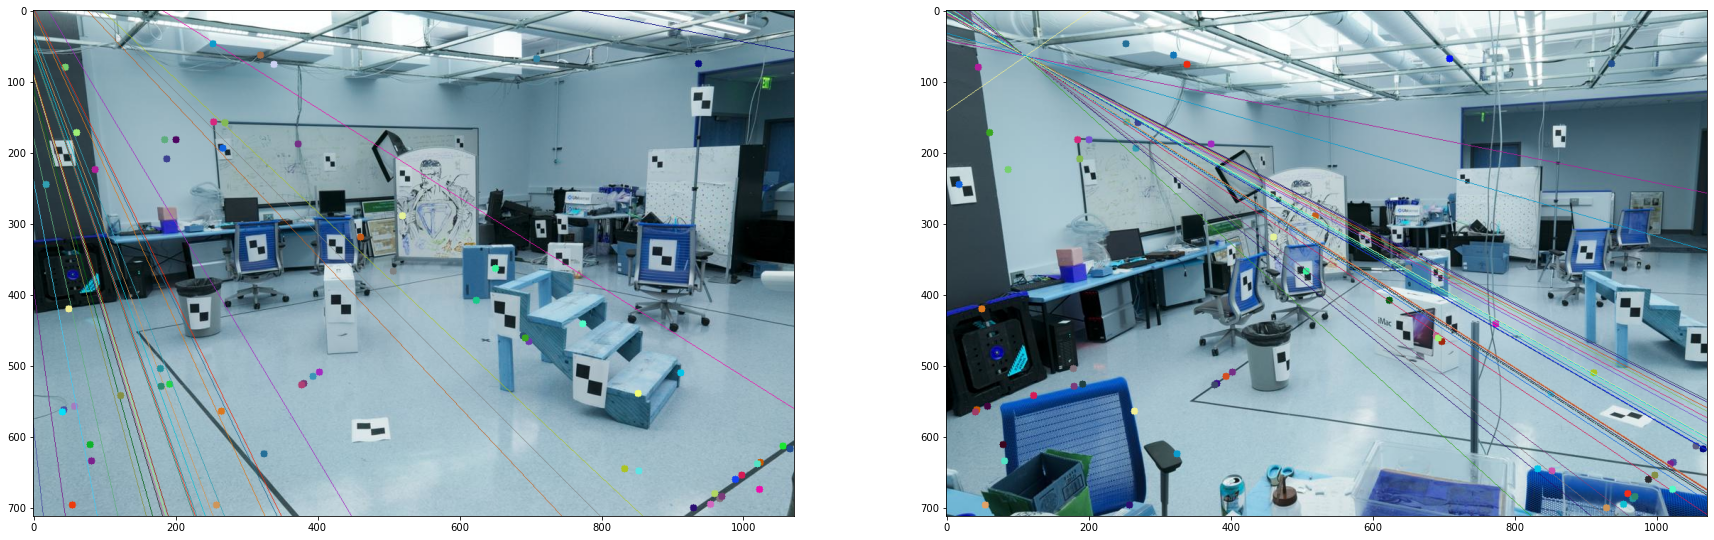

In [413]:
img1 = imread('./calibration/lab1.jpg')
img2 = imread('./calibration/lab2.jpg')
H, max_inliers, inliers = ransac(data)
print("Inliers:", max_inliers)
inliers = np.array(inliers).reshape(len(inliers),4).astype(int)
lines1 = cv.computeCorrespondEpilines(inliers[:,2:].reshape(-1,1,2), 2,H)
lines1 = lines1.reshape(-1,3)

img5,img6 = drawlines(img1,img2,lines1,inliers[:,:2],inliers[:,2:])
# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv.computeCorrespondEpilines(inliers[:,:2].reshape(-1,1,2), 1,H)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(img2,img1,lines2,inliers[:,:2],inliers[:,2:])
fig, ax = plt.subplots(figsize=(30,20))
plt.subplot(121),plt.imshow(img5)
plt.subplot(122),plt.imshow(img3)
plt.show()
